In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("house_prices.csv")

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
my_columns = [
    "BldgType", "HouseStyle", "OverallQual", "OverallCond",
    "YearBuilt", "YearRemodAdd", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "SalePrice"
]

df_subset = train_df[my_columns]

In [8]:
df_subset.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
254,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,145000
1066,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,178000
638,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,85000
799,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,175000
380,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,127000


In [9]:
df_subset.tail()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
1095,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,176432
1130,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,135000
1294,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,NaN,0.0,115000
860,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,189950
1126,TwnhsE,1Story,7,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,130.0,174000


In [10]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BldgType      1168 non-null   object 
 1   HouseStyle    1168 non-null   object 
 2   OverallQual   1168 non-null   int64  
 3   OverallCond   1168 non-null   int64  
 4   YearBuilt     1168 non-null   int64  
 5   YearRemodAdd  1168 non-null   int64  
 6   RoofStyle     1168 non-null   object 
 7   RoofMatl      1168 non-null   object 
 8   Exterior1st   1168 non-null   object 
 9   Exterior2nd   1168 non-null   object 
 10  MasVnrType    485 non-null    object 
 11  MasVnrArea    1162 non-null   float64
 12  SalePrice     1168 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 127.8+ KB


In [11]:
df_subset.describe()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000
mean,6.121575,5.584760,1970.965753,1984.897260,103.771945,181441.541952
std,1.367619,1.116062,30.675495,20.733955,173.032238,77263.583862
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000
25%,5.000000,5.000000,1953.000000,1966.000000,0.000000,130000.000000
50%,6.000000,5.000000,1972.000000,1994.000000,0.000000,165000.000000
75%,7.000000,6.000000,2001.000000,2004.000000,166.000000,214925.000000
max,10.000000,9.000000,2010.000000,2010.000000,1378.000000,745000.000000


In [12]:
total_nulls = df_subset.isnull().sum().sum()
print(total_nulls)

nulls_per_column = df_subset.isnull().sum()
print(nulls_per_column)

689
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      683
MasVnrArea        6
SalePrice         0
dtype: int64


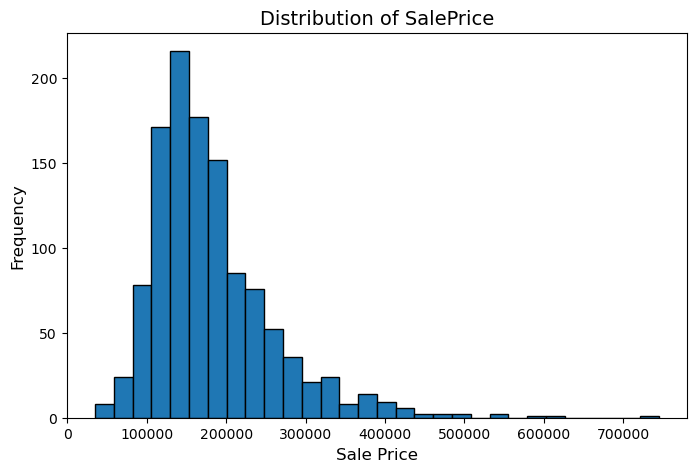

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(df_subset["SalePrice"], bins=30, edgecolor="black")

plt.title("Distribution of SalePrice", fontsize=14)
plt.xlabel("Sale Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

In [16]:
numeric_cols = df_subset.select_dtypes(include=['number']).columns
print(numeric_cols.tolist())

['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']


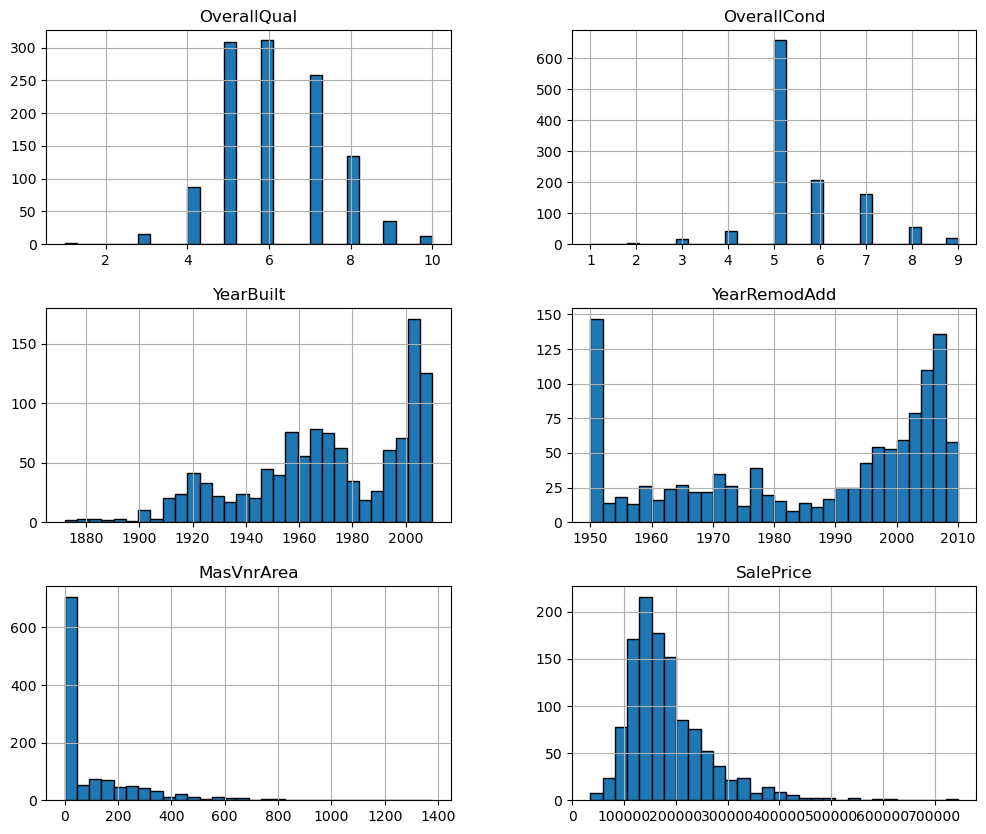

In [17]:
df_subset[numeric_cols].hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.show()

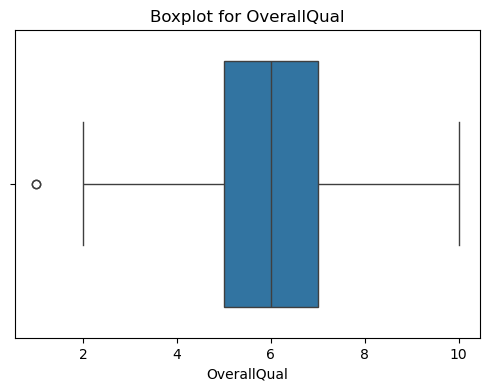

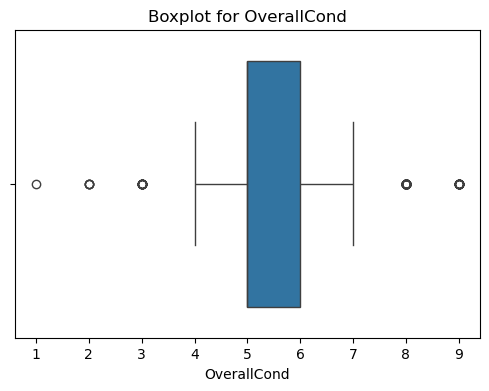

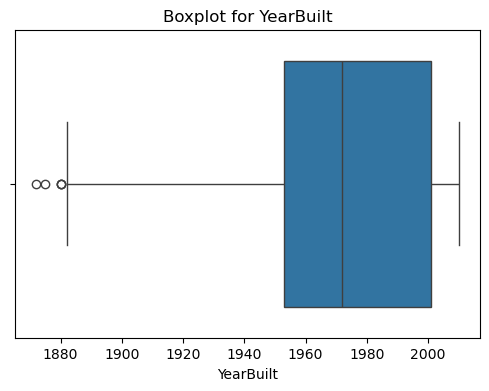

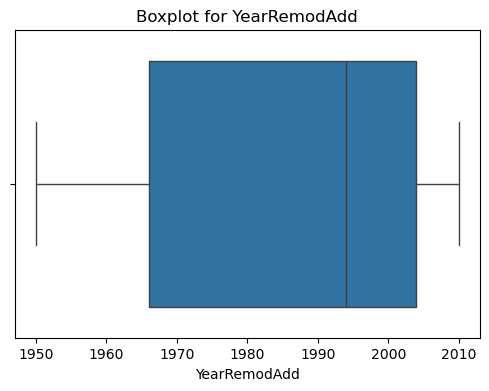

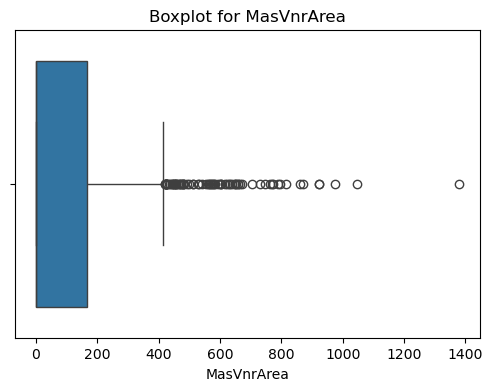

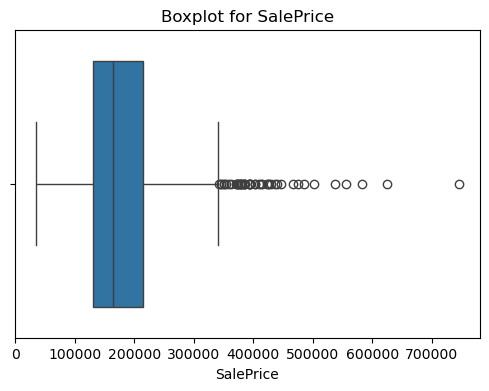

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_subset[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

In [20]:
categorical_cols = df_subset.select_dtypes(include=['object', 'category']).columns
print(categorical_cols.tolist())

['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']


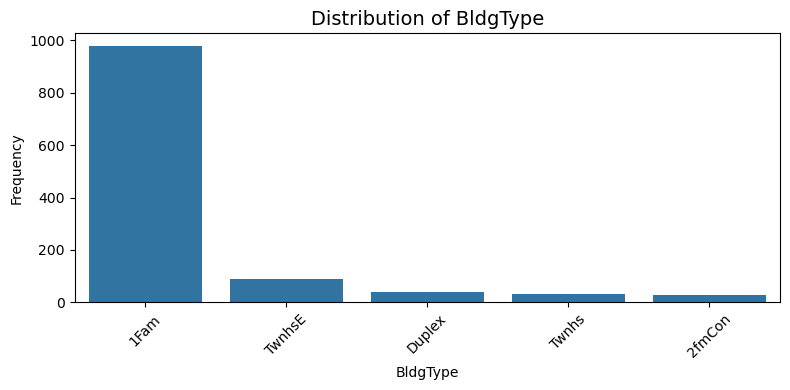

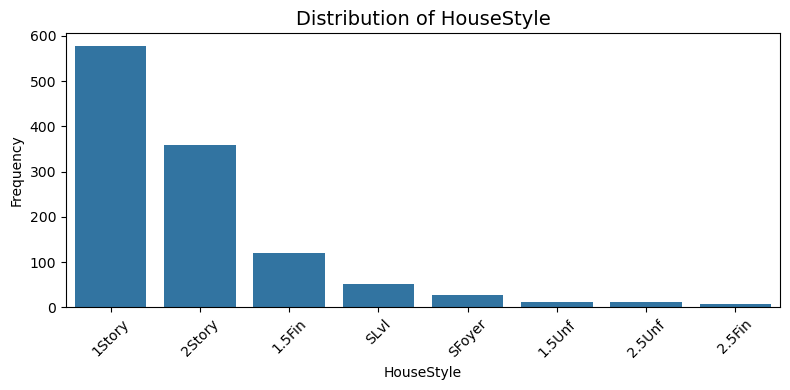

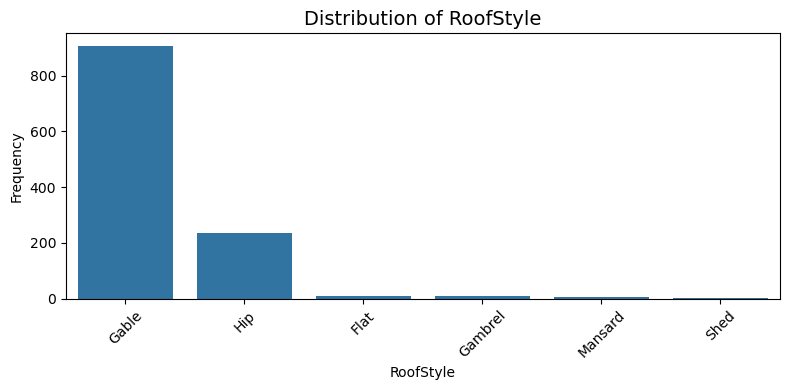

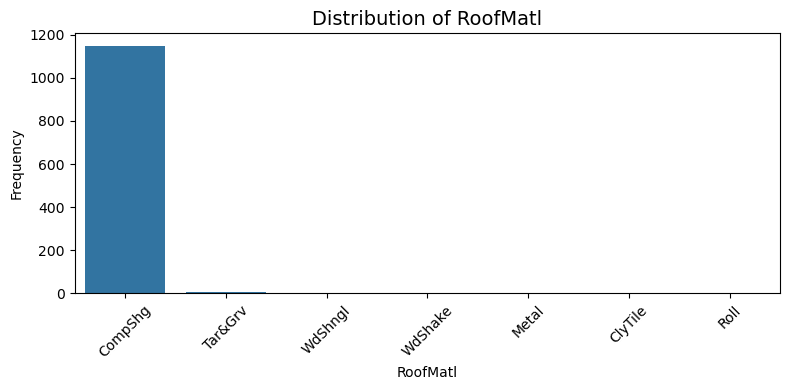

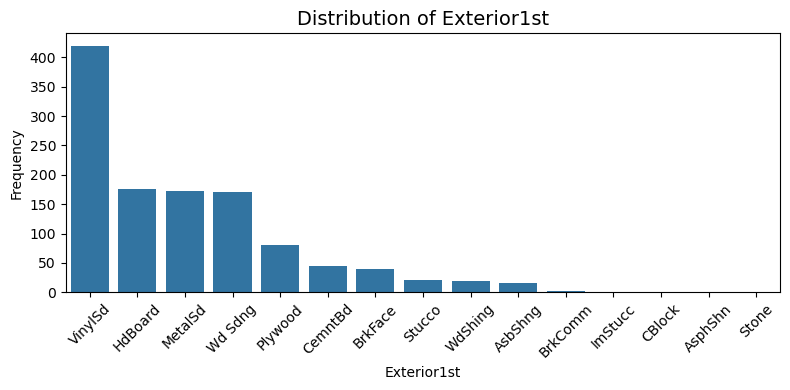

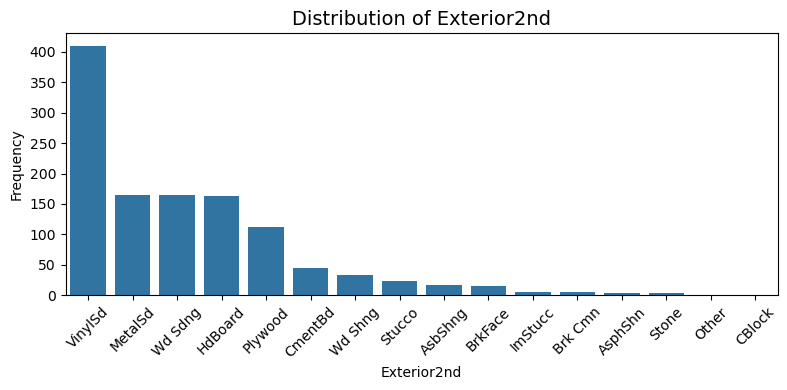

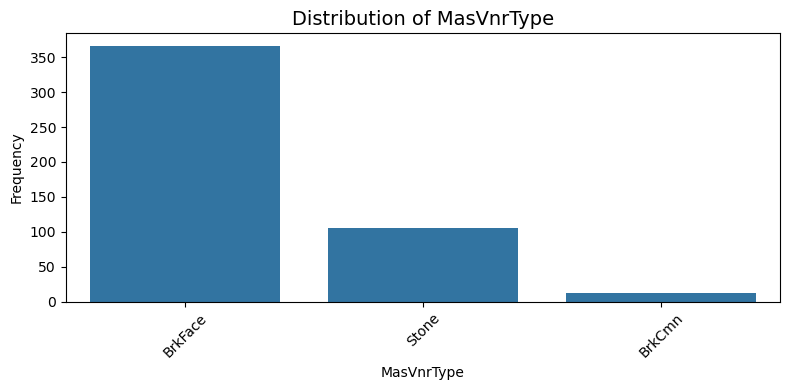

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_subset, x=col, order=df_subset[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()